# Gradient Descent for a simple linear regression problem

Most of this code comes from an excelent tutorial by Josh Gordon, available in YouTube (https://www.youtube.com/watch?v=eysk3Keduxk)

It shows automatic differentiation in the context of a simple problem

### Import PyTorch, MatPlotLib and Keras

In [13]:
import torch
import matplotlib.pyplot as plt

### Create noisy data

In [14]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = torch.rand(100)
  noise = torch.normal(mean=0.0, std=0.01, size=(1,100))
  y = m * x + b + noise
  return x, y


In [15]:
x_train, y_train = make_noisy_data()

### Show Data points

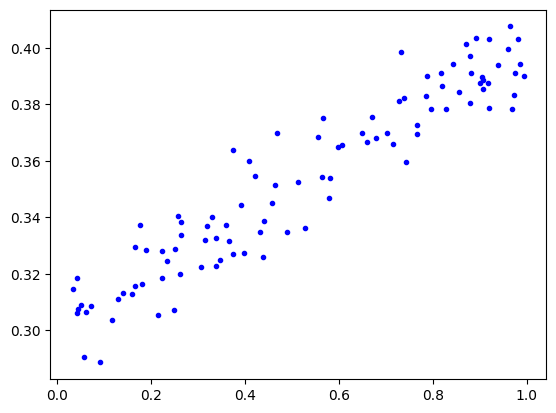

In [16]:
plt.plot(x_train, y_train[0], 'b.')

### Initialize m and b with random values

In [17]:
torch.manual_seed(5)
m = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

print(m,b)

tensor([0.8303], requires_grad=True) tensor([0.1261], requires_grad=True)


### The model

In [18]:
def predict(x):
  y = m * x + b
  return y

In [19]:
print(predict(1))

tensor([0.9564], grad_fn=<AddBackward0>)


## What the model knows before being trained

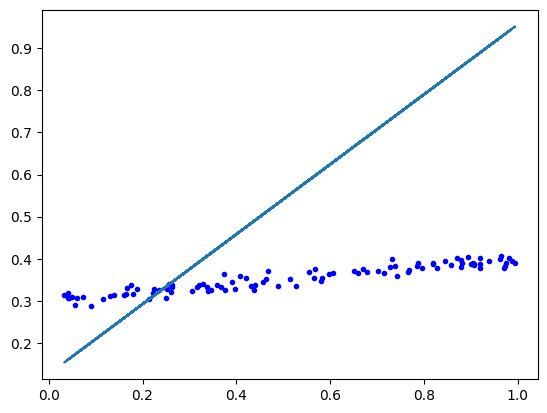

In [20]:
plt.plot(x_train, y_train[0], 'b.')
plt.plot(x_train, predict(x_train).detach().numpy())

### The loss function

In [21]:
def squared_error(y_pred, y_true):
    return torch.mean(torch.square(y_pred - y_true))

In [22]:
loss = squared_error(predict(x_train), y_train)
print("Starting loss: ", loss.detach().numpy())

Starting loss:  0.09264878


# Learning
Use gradient descent to gradually improve our guess of m and b

In [23]:
learning_rate = 0.05
epochs = 200

for i in range(epochs):

    predictions = predict(x_train)
    loss = squared_error(predictions, y_train[0])
    loss.backward()

    with torch.no_grad():
        m -= m.grad * learning_rate
        b -= b.grad * learning_rate
        m.grad.zero_()
        b.grad.zero_()

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.detach().numpy()))

   

Step 0, Loss 0.092649
Step 20, Loss 0.027914
Step 40, Loss 0.020933
Step 60, Loss 0.015825
Step 80, Loss 0.011970
Step 100, Loss 0.009060
Step 120, Loss 0.006863
Step 140, Loss 0.005205
Step 160, Loss 0.003954
Step 180, Loss 0.003009


In [230]:
with torch.no_grad():
    m = m.data -  m.grad * learning_rate

print(m)    

tensor([0.2533])


## What the model learned

In [212]:
print("m: %f, b: %f" % (m.detach().numpy(), b.detach().numpy()))

m: 0.108551, b: 0.295903


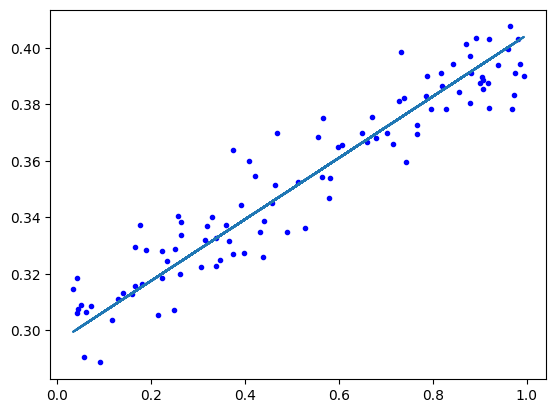

In [213]:
plt.plot(x_train, y_train[0], 'b.')
plt.plot(x_train, predict(x_train).detach().numpy())